In [47]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
# import data
chess = pd.read_csv('chess.csv')

In [49]:
# analysze data 
chess.head()

,time_control,end_time,rated,time_class,rules,gm_username,white_username,white_rating,white_result,black_username,black_rating,black_result
0,300+1,2021-06-19 11:40:40,True,blitz,chess,123lt,vaishali2001,2658,win,123lt,2601,resigned
1,300+1,2021-06-19 11:50:06,True,blitz,chess,123lt,123lt,2627,win,vaishali2001,2649,resigned
2,300+1,2021-06-19 12:01:17,True,blitz,chess,123lt,vaishali2001,2641,timeout,123lt,2649,win
3,300+1,2021-06-19 12:13:05,True,blitz,chess,123lt,123lt,2629,timeout,vaishali2001,2649,win
4,300+1,2021-06-19 12:28:54,True,blitz,chess,123lt,vaishali2001,2657,win,123lt,2611,resigned



## Dataset Description
The data contains information about all the games played by GM titled players on Chess.com in 2021.

We have information about:
- The time format
- Game is rated
- Rules adopted
- Usernames of both players
- Ratings for both players
- Result

Let's analyze each feature:



In [50]:
# time format
chess.value_counts('time_class')

time_class
blitz     599394
bullet    238246
rapid      18462
daily       3268
dtype: int64

In [51]:
def make_pie_chart(df: pd.DataFrame, column: str, visual_params=None):
    '''
    df -----------------> dataset containing the data
    column -------------> a column from df containing the data for the plot
    visual_params ------> a list with:
                          the explode parameter
                          pctdistance
                          labeldistance
    '''
    if visual_params is None:
        percentages = list(df.value_counts(column) / sum(df.value_counts(column)) * 100)
        percentages = ['{:.2f}%'.format(x) for x in percentages]

        plt.pie(df.value_counts(column),
                labels = df[column].unique(),
                autopct='%.2f%%',
                explode=[.2 for x in df[column].unique()],
                pctdistance=1.3,
                labeldistance=1.5
        )

        plt.show()
    else:
        assert len(visual_params) == 3, f'Incorrect number of parameters! {len(visual_params)} have been passed instead of 3'
        percentages = list(df.value_counts(column) / sum(df.value_counts(column)) * 100)
        percentages = ['{:.2f}%'.format(x) for x in percentages]

        plt.pie(df.value_counts(column),
                labels = df[column].unique(),
                autopct='%.2f%%',
                explode=[visual_params[0] for x in df[column].unique()],
                pctdistance=visual_params[1],
                labeldistance=visual_params[2]
        )

        plt.show()

def make_histogram(data: list, bins: int = 10, freq: bool = True):
    plt.hist(data, bins=bins, density=freq)
    plt.show()

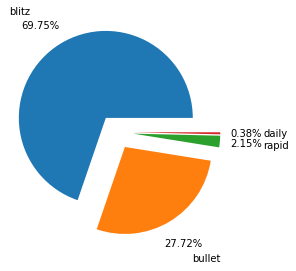

In [52]:
make_pie_chart(chess, 'time_class')

Blitz (300s + 1s per move) is the most played format (69.75%) with a total amount of 599394 games played

In [53]:
# game is rated
chess.value_counts('rated')

rated
True     813569
False     45801
dtype: int64

In [54]:
rated_percentage = {is_rated: chess.loc[chess.rated==is_rated].shape[0] / chess.shape[0] * 100 for is_rated in chess.rated.unique()}
rated_percentage

{True: 94.67039808231613, False: 5.329601917683885}

~94.5% of the games were rated

In [55]:
# rules adopted
chess.value_counts('rules')

rules
chess            824464
bughouse          28203
chess960           4962
oddschess           672
crazyhouse          554
threecheck          391
kingofthehill       124
dtype: int64

In [56]:
rules_percentage = {rule: chess.loc[chess.rules==rule].shape[0] / chess.shape[0] * 100 for rule in chess.rules.unique()}
rules_percentage

{'chess': 95.93818727672597,
 'bughouse': 3.2818227306049783,
 'chess960': 0.5773997230529342,
 'oddschess': 0.07819681859967186,
 'threecheck': 0.04549844653641621,
 'kingofthehill': 0.014429174860653735,
 'crazyhouse': 0.06446582961937233}

The majority of the games (~96%) were played under the regular chess rules

In [57]:
# ratings
players = {}
for _, row in chess.iterrows():
    player1 = row['white_username']
    player1_rat = row['white_rating']
    player2 = row['black_username']
    player2_rat = row['black_rating']
    if player1 not in players:
        players[player1] = player1_rat
    if player2 not in players:
        players[player2] = player2_rat

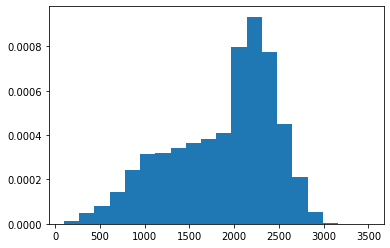

In [58]:
# let's have a look at the distribution of ratings
scores = [x for x in players.values()]
make_histogram(scores, 20, True)

In [59]:
avg_rating = sum(scores) / len(scores)
var_rating = sum([(x - avg_rating)**2 for x in scores]) / len(scores)

In [60]:
def median(data):
    data.sort()
    if len(data) % 2 == 0:
        return (data[len(data)/2]+data[len(data)/2-1])/2
    return data[int(len(data)/2)]

In [61]:
print('Average rating = {:.2f}\nStandard deviation = {:.2f}\nMax = {:.2f}\nMin = {:.2f}\nMedian = {:.2f}'.format(avg_rating, var_rating**.5, max(scores), min(scores), median(scores)))

Average rating = 1871.15
Standard deviation = 585.75
Max = 3500.00
Min = 100.00
Median = 2041.00


We have a right tailed distribution with mean 1871.15 and standard deviation 585.75. By comparing the minimun, maximum and median value we can say that the first half of ratings cover a much wider range going from 100 to 2041 while the second half peaks at 3500 

In [62]:
chess.value_counts('white_result')

white_result
win                    409809
resigned               201052
timeout                101316
checkmated              60620
repetition              31532
agreed                  16073
insufficient            13227
timevsinsufficient      11863
bughousepartnerlose      6440
stalemate                4145
abandoned                2883
50move                    267
threecheck                121
kingofthehill              22
dtype: int64

In [63]:
def synthetize_result(data: pd.DataFrame):
    data['result'] = None
    for i, row in data.iterrows():
        if row['white_result'] in ['win']:
            data.at[i, 'result'] = '1-0'
        else:
            if row['white_result'] in ['repetiion','agreed','insufficient','timevsinsufficient','stalemate','50move']:
                data.at[i,'result'] = '1-1'
            else:
                data.at[i,'result'] = '0-1'

In [64]:
# result
# for this section we will limit the scope of the analysis to games played under regular chess rules
chess = chess.loc[chess.rules=='chess']

In [65]:
synthetize_result(chess)

In [66]:
chess.value_counts('result')

result
1-0    392661
0-1    386597
1-1     45206
dtype: int64

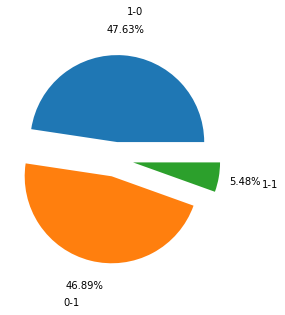

In [67]:
make_pie_chart(chess, 'result')

In [68]:
for time_format in ['bullet','blitz','rapid','daily']:
    print(time_format.capitalize()+':')
    results = {res : '{:.2f}%'.format(chess.loc[(chess.result==res)&(chess.time_class==time_format)].shape[0]/chess.loc[chess.time_class==time_format].shape[0] * 100) for res in chess.result.unique()}
    print(results)

Bullet:
{'1-0': '49.00%', '0-1': '46.92%', '1-1': '4.08%'}
Blitz:
{'1-0': '47.26%', '0-1': '47.00%', '1-1': '5.74%'}
Rapid:
{'1-0': '41.09%', '0-1': '43.70%', '1-1': '15.21%'}
Daily:
{'1-0': '47.11%', '0-1': '44.42%', '1-1': '8.47%'}


It looks like as the time available grows draws occur more frequently. 

Interestingly, if we exclude Rapid, the white player seems to be more likely to win the game

In [69]:
def update_personal_result(dictionary: dict, row: str, color: str):
    if color == 'white':
        if row['result'] == '1-0':
            dictionary[row[color+'_username']]['won'] += 1
            dictionary[row[color+'_username']]['won_white'] += 1
        dictionary[row[color+'_username']]['played_white'] += 1
    if color == 'black':
        if row['result'] == '0-1':
            dictionary[row[color+'_username']]['won'] += 1
            dictionary[row[color+'_username']]['won_black'] += 1
        dictionary[row[color+'_username']]['played_black'] += 1
    dictionary[row[color+'_username']]['played'] += 1

In [70]:
# top 5 players by win percentage
players_results = {}

for i, row in chess.iterrows():
    if row['white_username'] not in players_results:
        players_results[row['white_username']] = {'played':0,'won':0,'played_white':0,'won_white':0,'played_black':0,'won_black':0}
        update_personal_result(players_results, row, 'white')
    else:
        update_personal_result(players_results, row, 'white')
    if row['black_username'] not in players_results:
        players_results[row['black_username']] = {'played':0,'won':0,'played_white':0,'won_white':0,'played_black':0,'won_black':0}
        update_personal_result(players_results, row, 'black')
    else:
        update_personal_result(players_results, row, 'black')

In [71]:
for i, x in enumerate(players_results.items()):
    if i < 3:
        print(x)

('vaishali2001', {'played': 196, 'won': 57, 'played_white': 95, 'won_white': 26, 'played_black': 101, 'won_black': 31})
('123lt', {'played': 129, 'won': 67, 'played_white': 65, 'won_white': 34, 'played_black': 64, 'won_black': 33})
('GMStefanova', {'played': 101, 'won': 49, 'played_white': 52, 'won_white': 16, 'played_black': 49, 'won_black': 33})


In [74]:
# top 10 players by total winning percentage
top_players = sorted([{'username':player, '%':players_results[player]['won']/players_results[player]['played'] * 100,'played':players_results[player]['played']} for player in players_results],key=lambda x: x['%'], reverse=True)
# filter by players with at least 50 games
top_players = [_ for _ in top_players if _['played']>49]

In [90]:
def print_top_k(data: list, k: int):
    for entry in data[:k]:
        print("Username: {} {} \t Winning Percentage: {:.2f}".format(entry['username'],''.join([' ' for i in range(17-len(entry['username']))]),entry['%']))
    

In [91]:
print_top_k(top_players,10)

Username: gmkomarov          	 Winning Percentage: 96.09
Username: Illingworth        	 Winning Percentage: 95.59
Username: K_GRIGORYAN        	 Winning Percentage: 95.38
Username: sahpufjunior       	 Winning Percentage: 94.12
Username: Medvegy            	 Winning Percentage: 93.83
Username: GMHikaruOnTwitch   	 Winning Percentage: 93.76
Username: JMB2010            	 Winning Percentage: 93.18
Username: NotYetFinish       	 Winning Percentage: 92.81
Username: Zubov_On_YouTube   	 Winning Percentage: 91.36
Username: RLH2               	 Winning Percentage: 90.62


In [93]:
# top 10 players by white winning percentage
top_players_white = sorted([{'username':player, '%':players_results[player]['won_white']/max(1,players_results[player]['played_white']) * 100,'played':players_results[player]['played_white']} for player in players_results],key=lambda x: x['%'], reverse=True)
# filter by players with at least 50 games
top_players_white = [_ for _ in top_players_white if _['played']>49]

print_top_k(top_players_white,10)

Username: Illingworth        	 Winning Percentage: 95.97
Username: GMHikaruOnTwitch   	 Winning Percentage: 94.15
Username: K_GRIGORYAN        	 Winning Percentage: 93.08
Username: JMB2010            	 Winning Percentage: 92.86
Username: NotYetFinish       	 Winning Percentage: 92.49
Username: chessdude          	 Winning Percentage: 91.07
Username: sahpufjunior       	 Winning Percentage: 90.91
Username: RLH2               	 Winning Percentage: 89.74
Username: mironius           	 Winning Percentage: 87.34
Username: lcfox              	 Winning Percentage: 87.27


In [94]:
# top 10 players by black winning percentage
top_players_black = sorted([{'username':player, '%':players_results[player]['won_black']/max(1,players_results[player]['played_black']) * 100,'played':players_results[player]['played_black']} for player in players_results],key=lambda x: x['%'], reverse=True)
# filter by players with at least 50 games
top_players_black = [_ for _ in top_players_black if _['played']>49]

print_top_k(top_players_black,10)

Username: gmkomarov          	 Winning Percentage: 97.44
Username: K_GRIGORYAN        	 Winning Percentage: 97.11
Username: sahpufjunior       	 Winning Percentage: 97.01
Username: Zubov_On_YouTube   	 Winning Percentage: 96.30
Username: Illingworth        	 Winning Percentage: 95.21
Username: JMB2010            	 Winning Percentage: 93.52
Username: GMHikaruOnTwitch   	 Winning Percentage: 93.37
Username: NotYetFinish       	 Winning Percentage: 93.10
Username: Medvegy            	 Winning Percentage: 92.45
Username: RLH2               	 Winning Percentage: 91.46
